In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_size = 24
x = np.arange(dataset_size)
# y = x
y = np.arange(dataset_size, dtype=float)
start_date = 1999

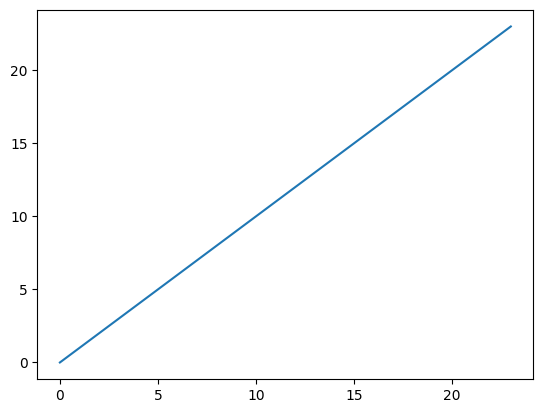

In [ ]:
plt.plot(x, y)
plt.show()

In [ ]:
noise = np.random.rand(dataset_size) * 1.5
noise = noise * np.random.choice([1, -1], dataset_size)
y += noise
print(y)

[-0.26902519  1.25180644  0.59742826  4.17575097  5.18752076  5.8775566
  5.3260103   7.46726873  8.93079469  8.57638928  9.59490266 12.48612625
 11.50337824 12.47962564 15.47727592 14.14006202 15.29974487 15.65267624
 19.31122054 19.76391807 18.51937822 21.51090692 21.38943799 22.66468099]


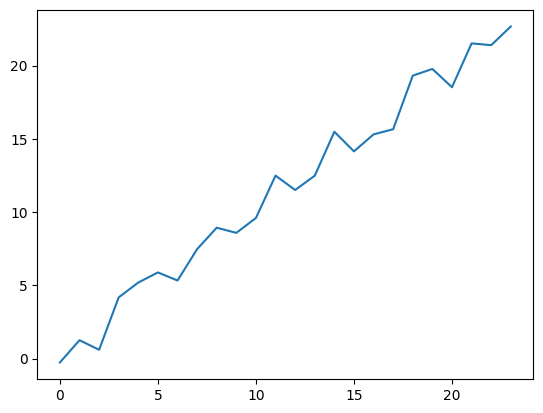

In [ ]:
plt.plot(x, y)

In [ ]:
x_new = x + start_date

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

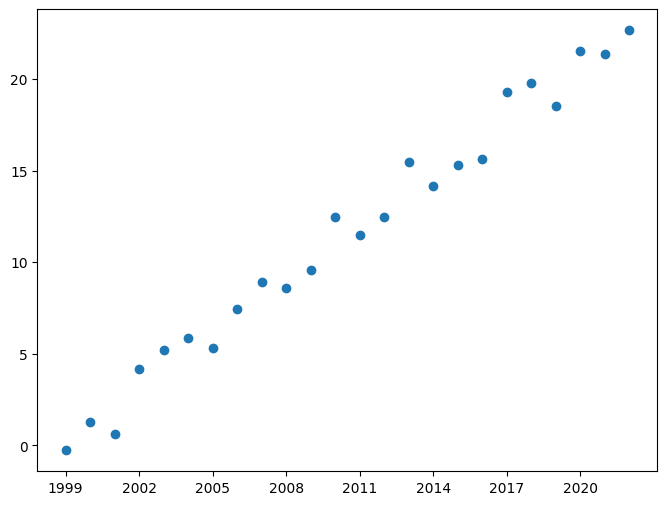

In [ ]:
#scatter plot, years on the x axis
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xticks(x[::3], [str(i) for i in np.arange(start_date, start_date + dataset_size)][::3])
plt.show()

# Train and Test

In [ ]:
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[-0.26902519  1.25180644  0.59742826  4.17575097  5.18752076  5.8775566
  5.3260103   7.46726873  8.93079469  8.57638928  9.59490266 12.48612625
 11.50337824 12.47962564 15.47727592 14.14006202 15.29974487 15.65267624
 19.31122054 19.76391807 18.51937822 21.51090692 21.38943799 22.66468099]


In [ ]:
available_data = 18
x_train, y_train = x[:available_data], y[:available_data]
x_test, y_test = x[available_data:], y[available_data:]

#Model

In [ ]:
#y = mx + c
def straight_line(x, m, c):
    return (x * m) + c

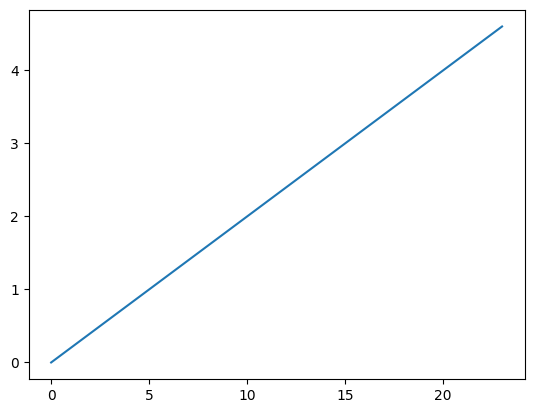

In [ ]:
plt.plot(x, straight_line(x, 0.2, 0))

In [ ]:
def show_plot(y_train, model):
    if len(y_train) != len(model):
        print('they need to be of the same size')
        return
    size = len(y_train)
    x = np.arange(size)
    plt.scatter(x, y_train)
    plt.plot(x, model, 'red')
    plt.show()

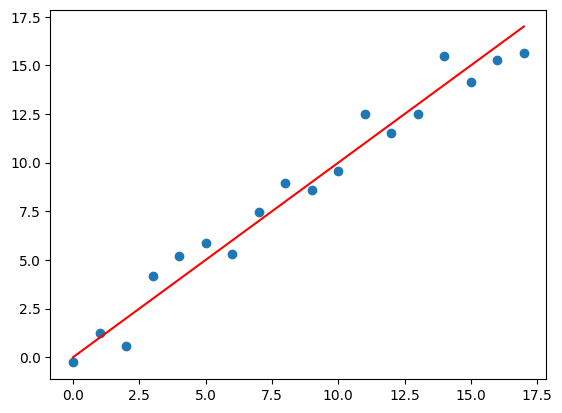

In [ ]:
model = straight_line(x_train, 1, 0)
show_plot(y_train, model)

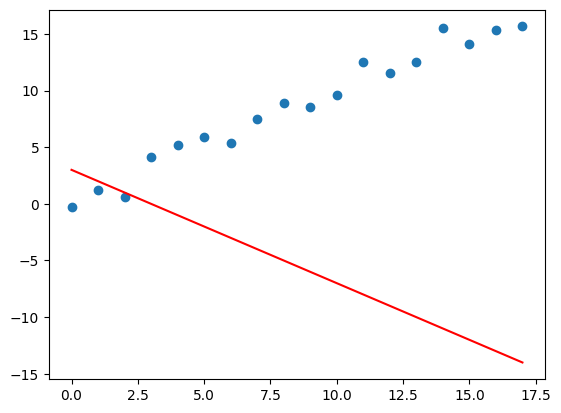

In [ ]:
m = -1
c = 3
model = straight_line(x_train, m, c)
show_plot(y_train, model)

#Model Evaluation

In [ ]:
print('error: ', sum(y_train - model))
def square_error(y, model):
    error = y - model
    sq_e = error**2
    return sum(sq_e)

error:  252.75529266736356


In [ ]:
print('square error: ', square_error(y_train, model))

square error: 5421.845456703162


In [ ]:
print('square error: ', square_error(y_train, straight_line(x_train, 1, 0)))

square error:  15.501690804482106


#Fit the model to the data

In [ ]:
m = -1 #np.random.randint()
c = 3
steps = 100
epsilon = 0.01

In [ ]:
def fit(y_train, m, c, steps=200, epsilon=0.01):
    model = straight_line(x_train, m, c)
    sq_e = square_error(y_train, model)
    print('initial square error:', sq_e)

    for i in range(steps):
        m_ = m + np.random.choice([1,-1], size=1) * epsilon
        c_ = c + np.random.choice([1,-1], size=1) * epsilon
        model_ = straight_line(x_train, m_, c_)
        sq_e_ = square_error(y_train, model_)
        if sq_e_ < sq_e:
            #updating the parameters
            m = m_
            c = c_
            sq_e = sq_e_

    print('final square error:', sq_e)
    return m, c

In [ ]:
m = -1 #np.random.randint()
c = 3
steps = 100
epsilon = 0.01

initial square error: 19.03415643559391
final square error: 18.23208795421901


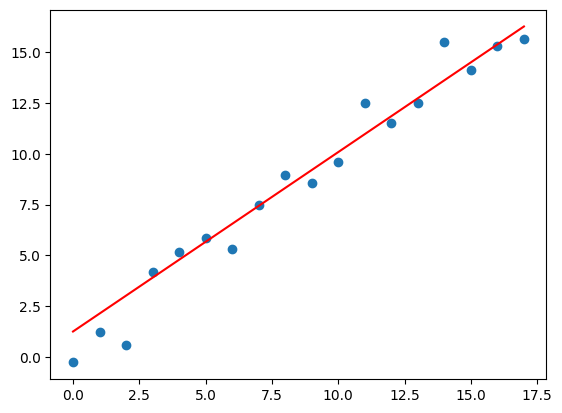

In [ ]:
m, c = fit(y_train, m, c, steps=20000, epsilon=0.00001)
final_model = straight_line(x_train, m, c)
show_plot(y_train, final_model)

#Model Validation

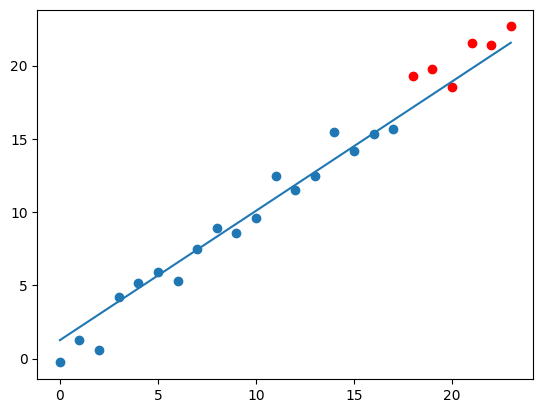

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c='red')
full_model = straight_line(x, m, c)
plt.plot(x, full_model)

In [ ]:
square_error(y, full_model)

30.82505899003719

In [ ]:
import sklearn